In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import pandas as pd  
import seaborn as sns 
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (12, 8)

**Loading the dataset**

In [ ]:
data=pd.read_csv('/ex1data1.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# New Section

**visualize the data**

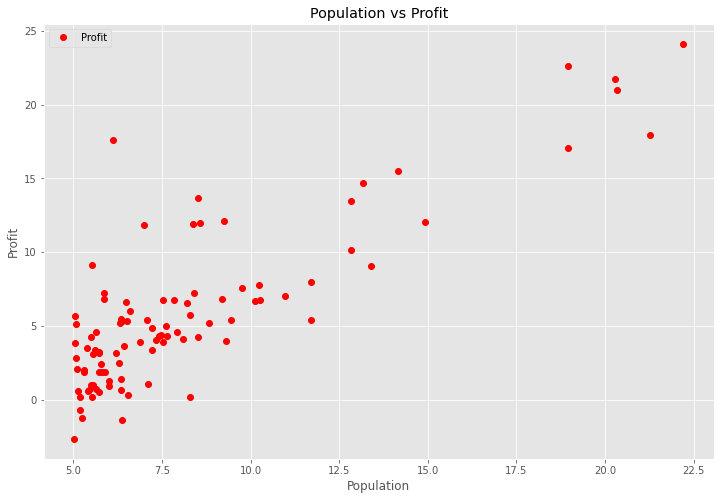

In [ ]:
 data.plot(x="Population",y="Profit",style="ro")
 plt.title("Population vs Profit")
 plt.xlabel('Population')
 plt.ylabel('Profit')
 plt.show()
#  help(plt)
# data.plot(x='Population', y='Profit', style='o') 


The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$
where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [ ]:
def costFunction(X,Y,theta):
  h=X.dot(theta)
  error=(h-Y)**2
  return (1/(2*m))*np.sum(error)


In [ ]:
m=data.Population.values.size
X = np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
Y = data['Profit'].values.reshape(-1,1)
theta=np.zeros((2,1))
costFunction(X,Y,theta)


32.072733877455676

**Gradient Descent**
Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [ ]:
def GradientDescent(X,Y,theta,alpha,iterations):
  J_cost=[]
  m=len(Y)
  for i in range(iterations):
    error=X.dot(theta)
    error_update=np.dot(X.transpose(),error-Y)
    theta=theta-(alpha/m)*error_update
    J_cost.append(costFunction(X,Y,theta))
  return theta,J_cost

In [ ]:
theta,J_cost=GradientDescent(X,Y,theta,alpha=0.01,iterations=2000)
print('the linear equation is {} + {}x'.format(theta[0,0],theta[1,0]))


the linear equation is -3.78806857272311 + 1.1822127747573767x


**Visualizing how J_cost varied with the iterations**


Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Descent')

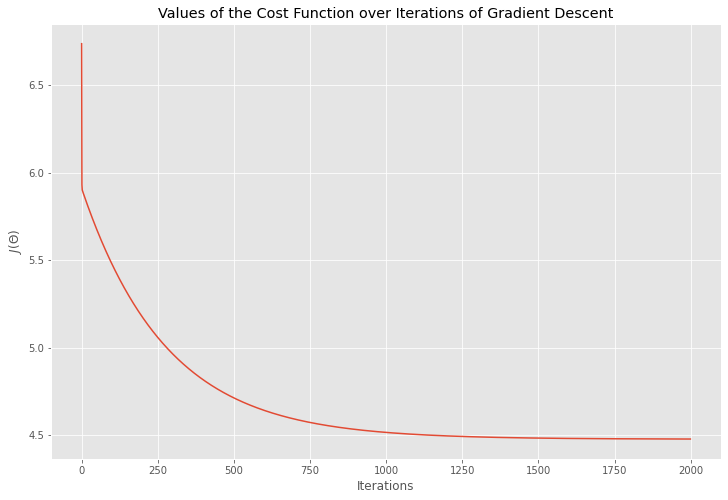

In [ ]:
plt.plot(J_cost)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent")

**y=mx+c**

In [ ]:
def predict(X,theta):
  return np.dot(theta.transpose(),X)


0.9407825263063971


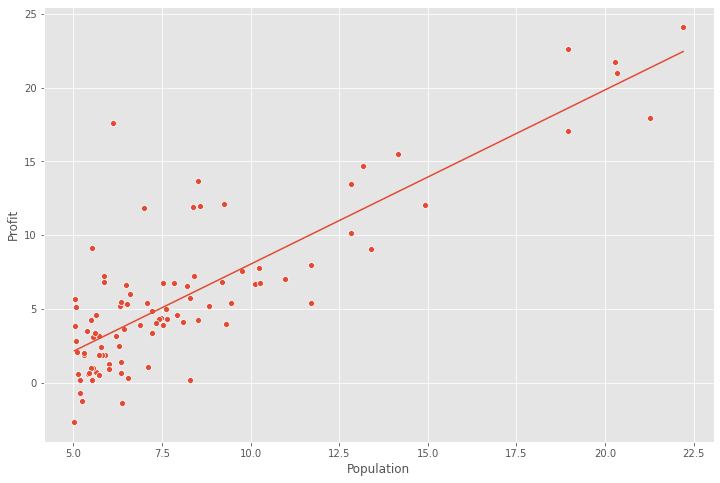

In [ ]:

theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data=data)
x_value = data.Population.values
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

3.435369702321938


NOW using the linearregression() inbluit function

In [ ]:
regressor=LinearRegression()

X1=data.Population.values.reshape(-1,1)
Y1=data.Profit.values.reshape(-1,1)
regressor.fit(X1,Y1)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **The difference between the parameters**
**bold text**

In [ ]:
theta2=np.zeros((2,1))
theta2[0,0]=regressor.intercept_
theta2[1,0]=regressor.coef_

print('our calculated intercept is {} and the intercept calculated by the library is {}'.format(theta[0],theta2[0,0]))
print('our calculated coefficient is {} and the coefficient calculated by the library is {}'.format(theta[1],theta2[1,0]))
print('our calculated linear equation is {} + {}x'.format(theta[0],theta[1]))
print('the linear equation by inbuilt-function is {} + {}x'.format(theta2[0,0],theta2[1,0]))

our calculated intercept is -3.78806857272311 and the intercept calculated by the library is -3.89578087831185
our calculated coefficient is 1.1822127747573767 and the coefficient calculated by the library is 1.1930336441895935
our calculated linear equation is -3.78806857272311 + 1.1822127747573767x
the linear equation by inbuilt-function is -3.89578087831185 + 1.1930336441895935x
